In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Fig. 1

In [2]:

error_color='indianred'

In [3]:

logp_data=np.loadtxt("fig_data/fes/logPs_nucleosides")
hbonds_nitr_data=np.loadtxt("fig_data/contacts/nitrogens_nucleosides")
tot_hbonds_data=np.loadtxt("fig_data/contacts/tot_hbonds_memb_nucleosides")
vdw_data=np.loadtxt("fig_data/contacts/vdw_memb_nucleosides")
vdw_wat_diff_data=np.loadtxt("fig_data/contacts/diff_wat_vdw_nucleosides")
hydr_data=np.loadtxt("fig_data/hydr_fes/hydr_fes_nucleosides")
hydr_data=hydr_data

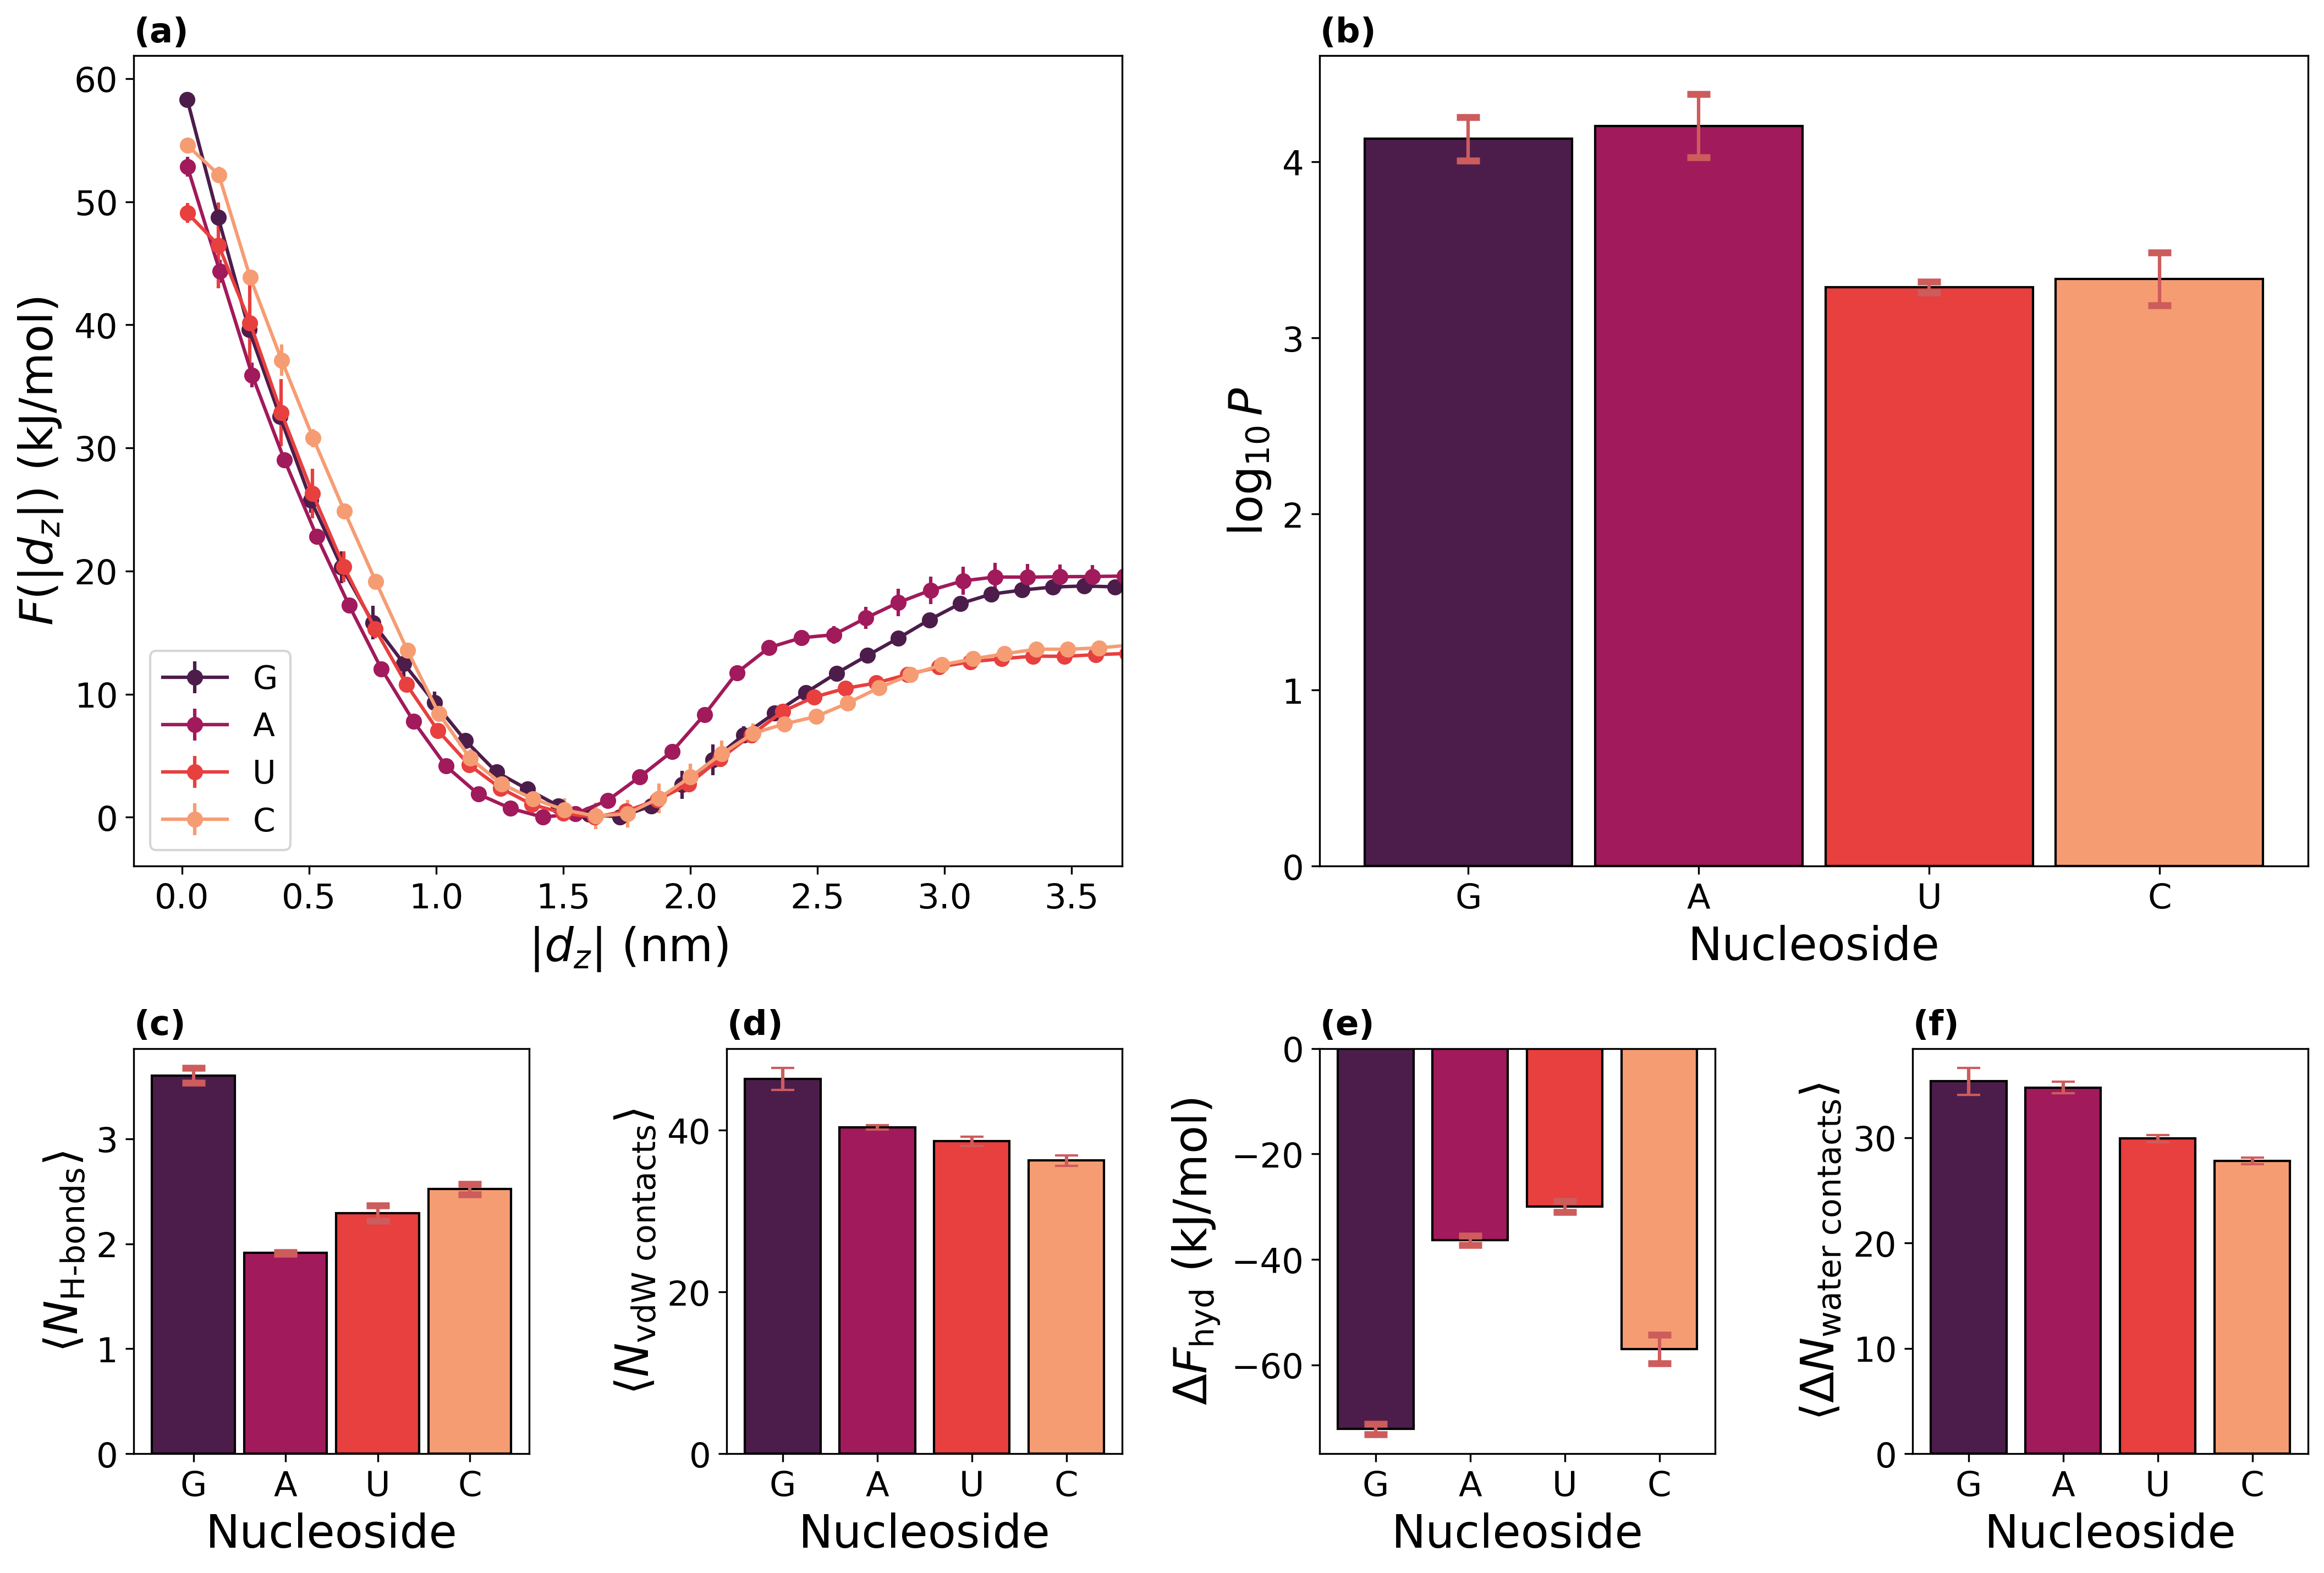

In [ ]:

palette1 = sns.color_palette("rainbow", 12)
palette2 = sns.color_palette("rocket", 4)
palette2_int = sns.color_palette("rocket", 8)
palette3 = sns.color_palette("coolwarm", 4)
gs = gridspec.GridSpec(2, 4, width_ratios=[0.5, 0.5, 0.5,0.5], height_ratios=[0.6, 0.3])

# Define font size
font_size = 16

# Create the subplots
fig = plt.figure(figsize=(17, 11),dpi=300)
fig.subplots_adjust(wspace=0.5, hspace=0.3)
ax1 = plt.subplot(gs[0, :2])  # Top left plot spanning 2 columns
ax2 = plt.subplot(gs[0, 2:])   # Top right plot
ax3 = plt.subplot(gs[1, 0])   # Bottom left plot
ax4 = plt.subplot(gs[1, 1])   # Bottom middle plot
ax5 = plt.subplot(gs[1, 2])   # Bottom right plot
ax6 = plt.subplot(gs[1, 3])   # Bottom right plot
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax5.tick_params(axis='both', which='major', labelsize=15)
ax6.tick_params(axis='both', which='major', labelsize=15)
font_size=20
##1.Plotting FES.
nucls=["G","A","U","C"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    ax1.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color=palette2[i_nucl])

ax1.set_xlabel("$|d_z|$ (nm)",size=font_size)
ax1.set_ylabel(r"$F(|d_z|$) (kJ/mol)",size=font_size)
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)
ax1.set_xlim(right=3.7)
ax1.legend(fontsize=14,loc='lower left')
#2.Plot logPs
for i_nucl,nucl in enumerate(nucls):
    ax2.bar(nucl,logp_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.9,color=palette2[i_nucl])
    ax2.errorbar(nucl,logp_data[i_nucl,0],yerr=logp_data[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)
ax2.set_ylabel(r"$\log_{10}P$",size=font_size)
ax2.set_xlabel("Nucleoside",size=font_size)
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)



#3. hbonds
palette2_int = sns.color_palette("rocket", 12)

#2.Plot logPs
for i_nucl,nucl in enumerate(nucls):
    ax3.bar(nucl,tot_hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.9,color=palette2[i_nucl])
    ax3.errorbar(nucl,tot_hbonds_data[i_nucl,0],yerr=tot_hbonds_data[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)

ax3.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$",size=font_size)
ax3.set_xlabel("Nucleoside",size=font_size)
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)
vdw_contacts=vdw_data[:,0]
err_vdw_contacts=vdw_data[:,1]

ax4.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",fontsize=font_size)
ax4.set_xlabel("Nucleoside",fontsize=font_size)
for i_nucl, nucl in enumerate(nucls):
    ax4.bar(nucl,vdw_contacts[i_nucl],color=palette2[i_nucl],edgecolor='black')
ax4.set_title("$\mathbf{(d)}$",loc='left',fontsize=15)

ax4.errorbar(nucls,vdw_contacts,yerr=err_vdw_contacts,fmt='none',color=error_color,barsabove=True,capsize=5)
   

#5. Plot differences in water hydration
vdw_wat_diff_data
diff_wat=vdw_wat_diff_data[:,0]
err_diff_wat=vdw_wat_diff_data[:,1]
ax6.set_ylabel(r"$\langle \Delta N_{\text{water contacts}}\rangle$",fontsize=font_size)
ax6.set_xlabel("Nucleoside",fontsize=font_size)
for i_nucl, nucl in enumerate(nucls):
    ax6.bar(nucl,diff_wat[i_nucl],color=palette2[i_nucl],edgecolor='black')
ax6.set_title("$\mathbf{(f)}$",loc='left',fontsize=15)

ax6.errorbar(nucls,diff_wat,yerr=err_diff_wat,fmt='none',color=error_color,barsabove=True,capsize=5)
   




#6. Plot hydration free energy
for i_nucl,nucl in enumerate(nucls):
    ax5.bar(nucl,hydr_data[i_nucl,0],color=palette2[i_nucl],edgecolor='black')
    ax5.errorbar(nucl,hydr_data[i_nucl,0],yerr=hydr_data[i_nucl,1],color=error_color,fmt='none',barsabove=True,capsize=5,capthick=3)
ax5.set_xlabel("Nucleoside",fontsize=font_size)
ax5.set_ylabel(r"$\Delta F_{\text{hyd}}$ (kJ/mol)",fontsize=font_size)
ax5.set_title("$\mathbf{(e)}$",loc='left',fontsize=15)



plt.savefig('fig_data/nucleosides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig. 2

In [ ]:
nucls=["G2","A2","U2","C2"]
logp_data=np.loadtxt("fig_data/fes/logPs_all")
hbonds_data=np.loadtxt("fig_data/contacts/avg_hbonds_all")
vdw_data=np.loadtxt("fig_data/contacts/vdw_memb_all")

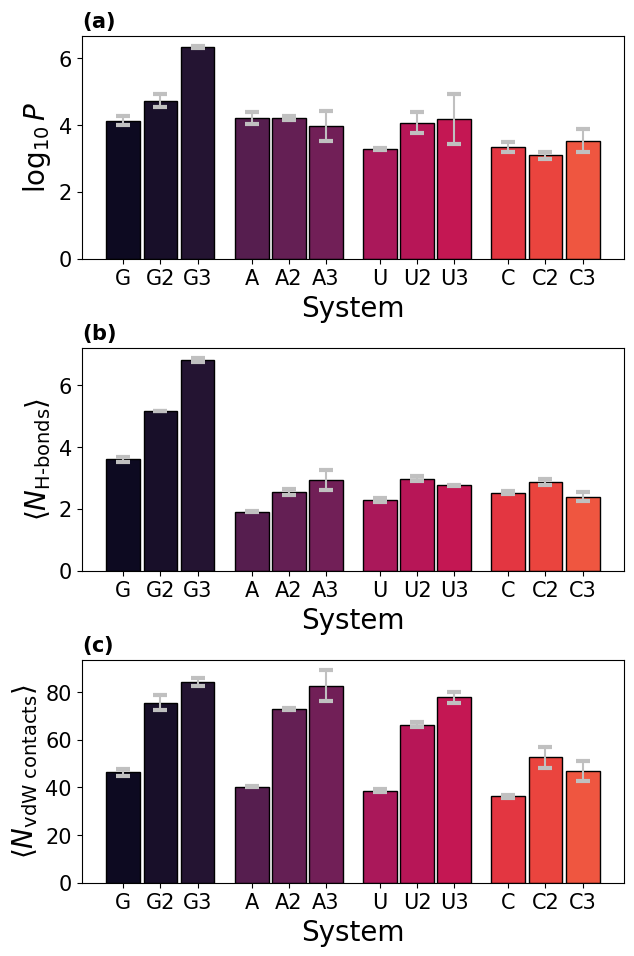

In [ ]:
palette2_int = sns.color_palette("rocket", 30)
logks=logp_data[:,0]
err_logks=logp_data[:,1]
fig = plt.figure(figsize=(7, 11))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
gs = gridspec.GridSpec(3, 1, width_ratios=[0.5], height_ratios=[0.5, 0.5,0.5])
ax1 = plt.subplot(gs[0, 0])   # Top right plot
ax2 = plt.subplot(gs[1, 0])   # Bottom left plot
ax3 = plt.subplot(gs[2, 0])   # Bottom middle plot
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
font_size=20
#Plotting al logPs
small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

ax1.set_xticks(ticks=namelist,labels=['G','G2','G3','A','A2','A3','U','U2','U3','C','C2','C3'])
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)
color_list=[0,1,2,6,7,8,12,13,14,17,18,19]
for i_nucl in nucleosides:
    
    ax1.bar(namelist[i_nucl],logks[i_nucl],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in dinucleotides:
    ax1.bar(namelist[i_nucl],logks[i_nucl],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in trinucleotides:
    ax1.bar(namelist[i_nucl],logks[i_nucl],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
ax1.errorbar(namelist,logks,yerr=err_logks,fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax1.set_ylabel(r"$\log_{10}P$",size=font_size)
ax1.set_xlabel("System",size=font_size)


#2. Total hbonds


nucls=["G","G2","G3","A","A2","A3","U","U2","U3","C","C2","C3"]

palette2_int = sns.color_palette("rocket", 30)
logks=logp_data[:,0]
err_logks=logp_data[:,1]

small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

ax2.set_xticks(ticks=namelist,labels=['G','G2','G3','A','A2','A3','U','U2','U3','C','C2','C3'])
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)
color_list=[0,1,2,6,7,8,12,13,14,17,18,19]
for i_nucl in nucleosides:
    
    ax2.bar(namelist[i_nucl],hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in dinucleotides:
    ax2.bar(namelist[i_nucl],hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in trinucleotides:
    ax2.bar(namelist[i_nucl],hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
ax2.errorbar(namelist,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$",size=font_size)
ax2.set_xlabel("System",size=font_size)


#3. VdW interactions

nucls=["G","G2","G3","A","A2","A3","U","U2","U3","C","C2","C3"]
 
palette2_int = sns.color_palette("rocket", 30)
logks=logp_data[:,0]
err_logks=logp_data[:,1]

small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)
color_list=[0,1,2,6,7,8,12,13,14,17,18,19]
for i_nucl in nucleosides:
    
    ax3.bar(namelist[i_nucl],vdw_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in dinucleotides:
    ax3.bar(namelist[i_nucl],vdw_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in trinucleotides:
    ax3.bar(namelist[i_nucl],vdw_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
ax3.errorbar(namelist,vdw_data[:,0],yerr=vdw_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax3.set_xlabel("System",size=font_size)
ax3.set_xticks(ticks=namelist,labels=['G','G2','G3','A','A2','A3','U','U2','U3','C','C2','C3'])
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)

#4. hydration free energies

nucls=["G","G2","G3","A","A2","A3","U","U2","U3","C","C2","C3"]
 
palette2_int = sns.color_palette("rocket", 30)
logks=logp_data[:,0]
err_logks=logp_data[:,1]

small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)
color_list=[0,1,2,6,7,8,12,13,14,17,18,19]



plt.savefig('fig_data/all_small.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Figure 3

In [ ]:
logp_strand=np.round(np.loadtxt("fig_data/fes/logPs_strand"),1)
logp_quad=np.round(np.loadtxt("fig_data/fes/logPs_quadruplex"),1)
hbonds_nitr_data_quad=np.loadtxt("fig_data/contacts/nitrogens_quadruplex")
res_cont_quad=np.loadtxt("fig_data/contacts/res_contacts_quadruplex.dat")
res_cont_strand=np.loadtxt("fig_data/contacts/res_contacts_strand.dat")
tot_hbonds_quad=np.loadtxt("fig_data/contacts/tot_hbonds_quadruplex")
tot_hbonds_strand=np.loadtxt("fig_data/contacts/tot_hbonds_strand")

[11.16168888  5.22984829] [1.91358051 0.50993948]
[ 5.61139879 10.30868344] [1.21027195 0.94137434]


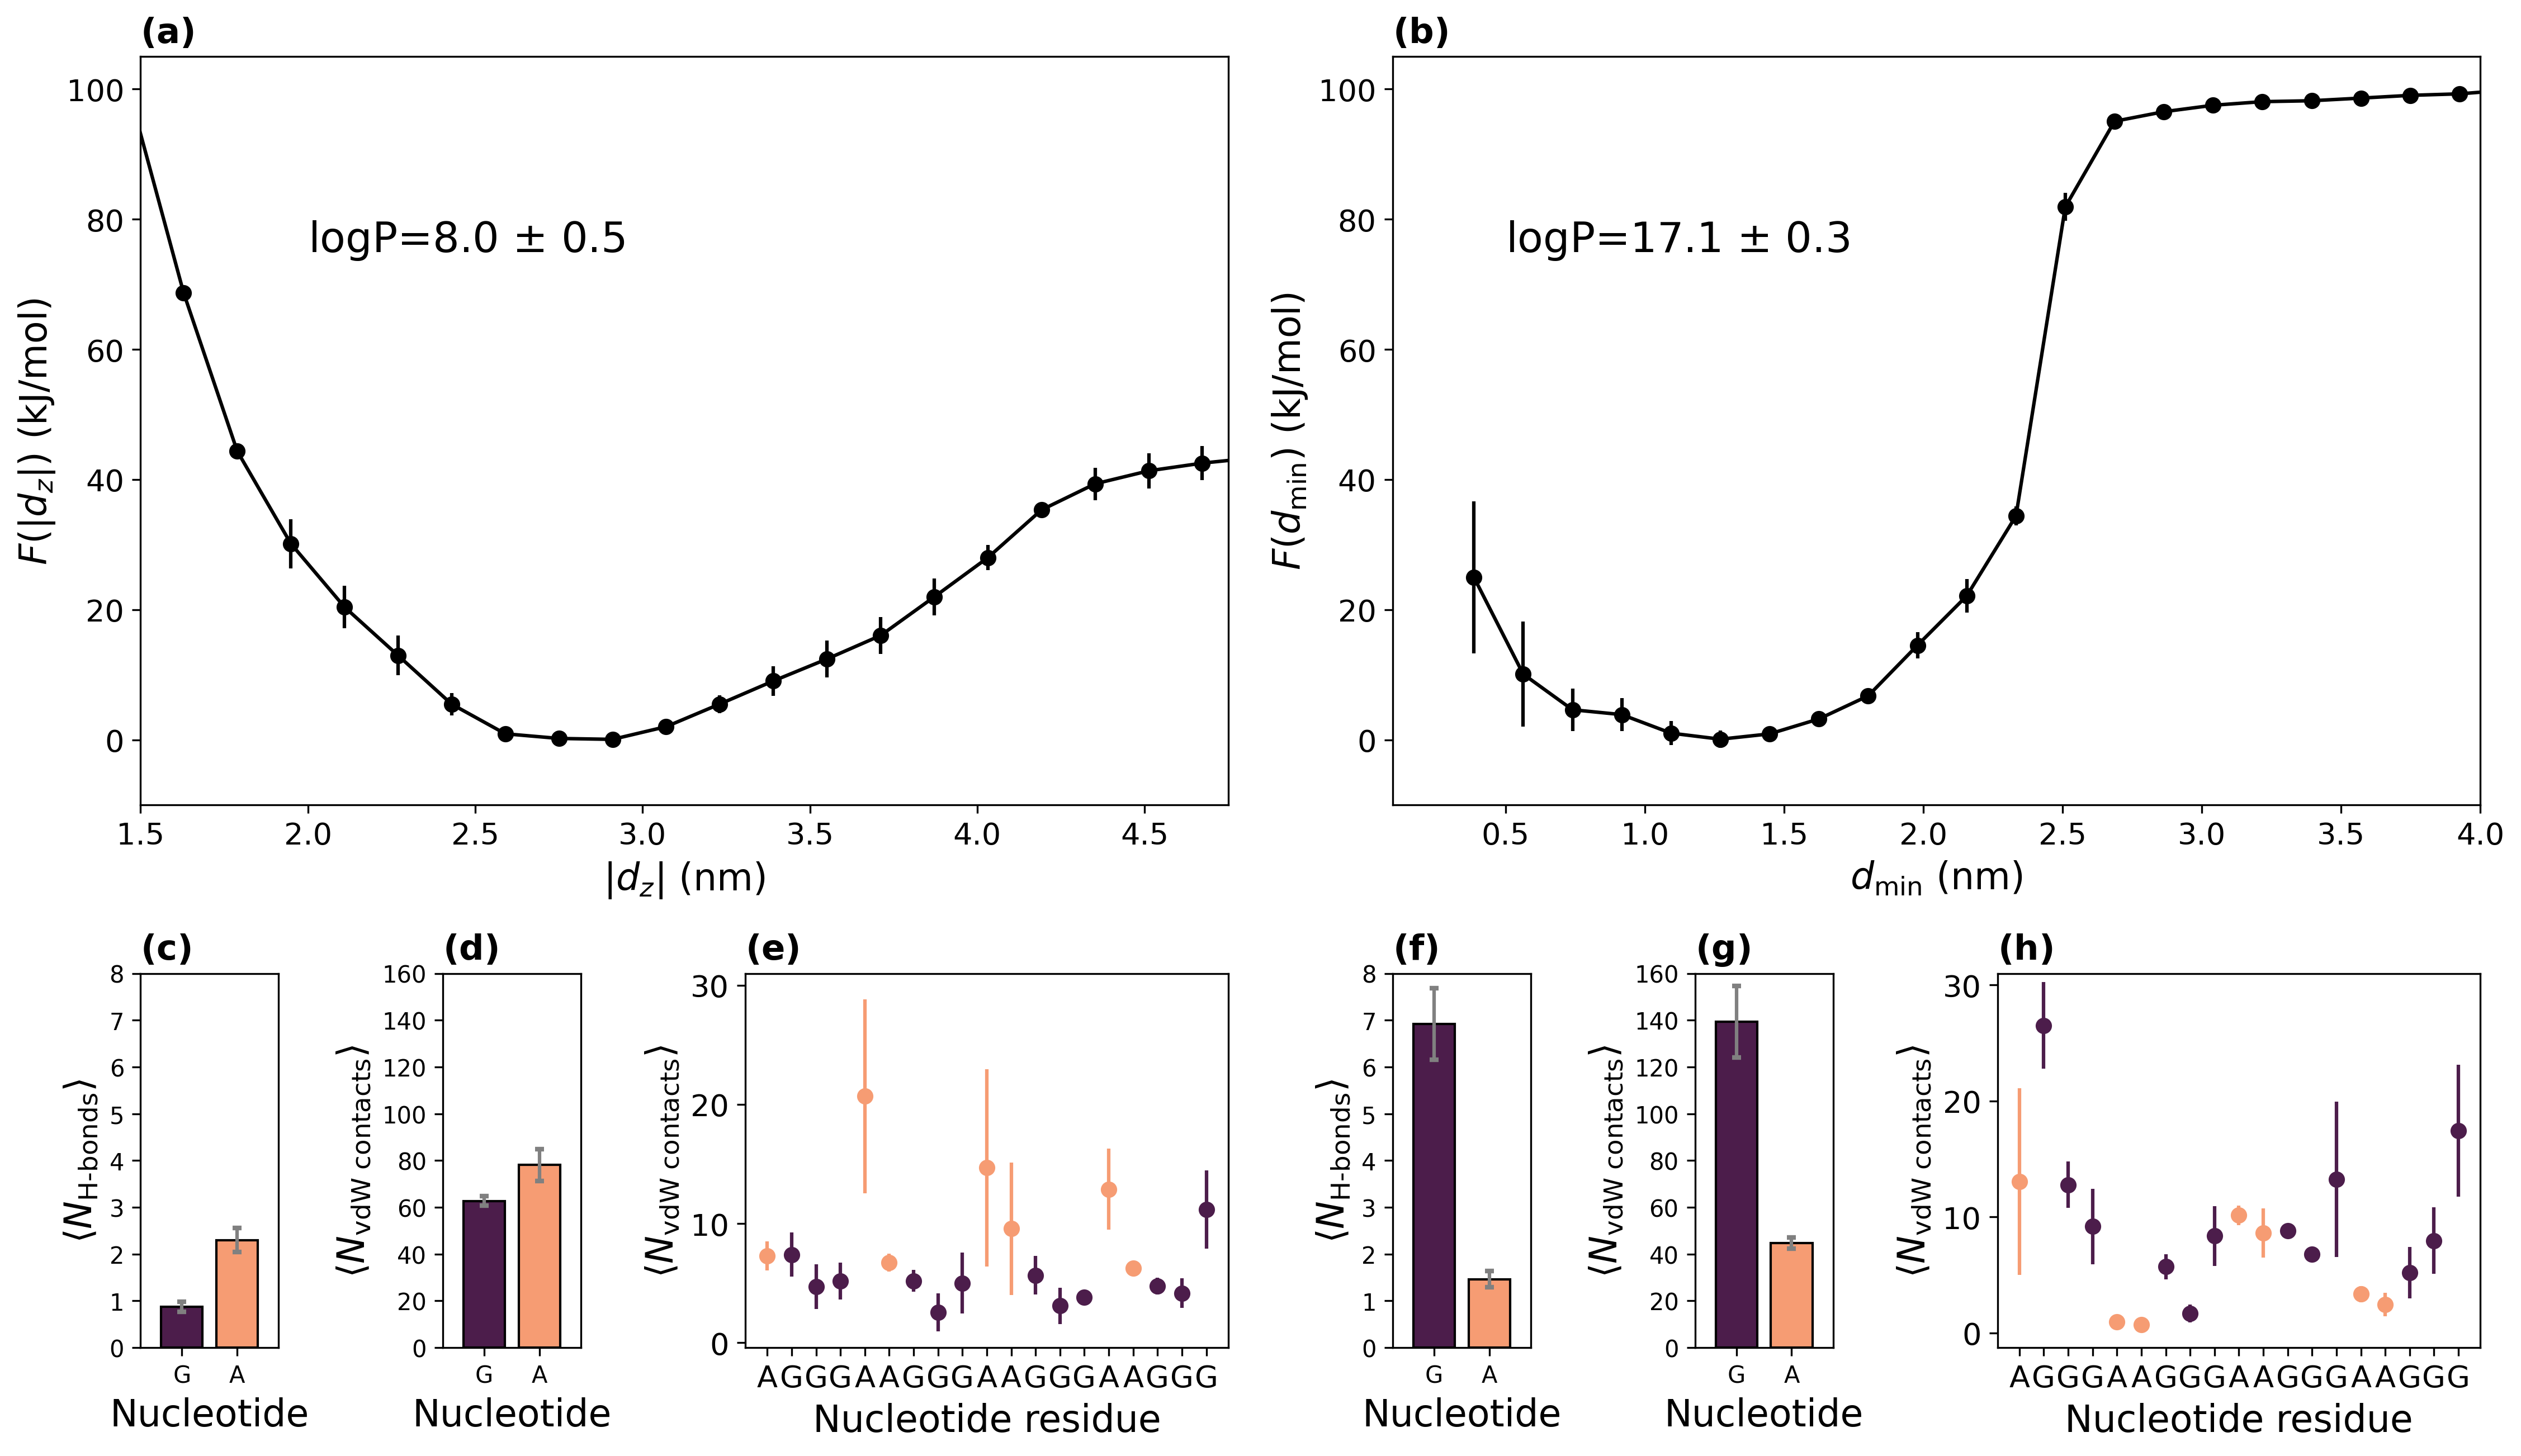

In [ ]:
barwidth=0.75
palette1 = sns.color_palette("rainbow", 12)
palette2 = sns.color_palette("rocket", 4)
palette2_int = sns.color_palette("rocket", 8)
palette3 = sns.color_palette("coolwarm", 4)
gs = gridspec.GridSpec(2, 6, width_ratios=[0.2, 0.2,0.7,0.2,0.2,0.7], height_ratios=[0.8, 0.4])

# Define font size

# Create the subplots
fig = plt.figure(figsize=(18, 10),dpi=300)
fig.subplots_adjust(wspace=0.65, hspace=0.3)
ax1 = plt.subplot(gs[0,:3]) # FES quadruplex
ax2 = plt.subplot(gs[0, 3:])    #fes strand
ax3 = plt.subplot(gs[1, 2:3])   #vdw per residue quadruplex
ax4 = plt.subplot(gs[1, 5:6]) #vdw per residue strand 
ax5 = plt.subplot(gs[1, 0])  #hbonds avg quadruple
ax6 = plt.subplot(gs[1, 1])  #vdw avg quadruplex
ax7 = plt.subplot(gs[1, 3])   #hbonds avg quadruplex
ax8 = plt.subplot(gs[1, 4])   #hbonds avg quadruplex
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax3.tick_params(axis='both', which='major', labelsize=13)
ax4.tick_params(axis='both', which='major', labelsize=13)
font_size=16
##1.Plotting G4 FES.
nucls=["quadruplex"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    ax1.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color='black')
ax1.text(2,75,s="logP="+str(logp_quad[0])+" $\pm$ " +str(logp_quad[1]),fontsize=18)
ax1.set_xlim(left=1.5,right=4.75)
ax1.set_xlabel("$|d_z|$ (nm)",size=font_size)
ax1.set_ylabel(r"$F(|d_z|)$ (kJ/mol)",size=font_size)
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)
ax1.set_ylim(top=105,bottom=-10)

nucls=["strand"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    ax2.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color='black')
ax2.text(0.5,75,s="logP="+str(logp_strand[0])+" $\pm$ " +str(logp_strand[1]),fontsize=18)
ax2.set_xlabel(r"$d_{\text{min}}$ (nm)",size=font_size)
ax2.set_ylabel(r"$F(d_{\text{min}})$ (kJ/mol)",size=font_size)
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)
ax2.set_xlim(right=4)
ax2.set_ylim(top=105,bottom=-10)



##3. ResContact quadruplex
string="AGGGAAGGGAAGGGAAGGG"
totnum=np.zeros(2)
list=[str for str in string]
avgs=res_cont_quad[:,0]
errs=res_cont_quad[:,1]
err=np.zeros(2)
for i_str,str_nucl in enumerate(list):
    if str_nucl=="A":
        ax3.plot(i_str,avgs[i_str],marker='o',color=palette2[3])
        ax3.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=palette2[3])
        totnum[0]+=avgs[i_str]
        err[0]+=errs[i_str]**2
    else:
        ax3.plot(i_str,avgs[i_str],marker='o',color=palette2[0])
        ax3.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=palette2[0])
        totnum[1]+=avgs[i_str]
        err[1]+=errs[i_str]**2
ax3.set_ylim(top=31)
totnum[0]=totnum[0]/7
totnum[1]=totnum[1]/12
err[0]=np.sqrt(err[0])/7
err[1]=np.sqrt(err[1])/12
print(totnum,err)

ax3.set_xticks(ticks=np.arange(0,19,1),labels=list)
ax3.set_xlabel("Nucleotide residue",size=font_size)
ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax3.set_title("$\mathbf{(e)}$",loc='left',fontsize=15)


ax6.set_xlim(left=-0.75,right=1.75)


ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)

data_avgcontacts=np.loadtxt("fig_data/contacts/naveragevdw_quadruplex")
data_avgcontacts[0,:]*=12
data_avgcontacts[1,:]*=7
for i_nucl,nucl in enumerate(["G","A"]):
    
    ax6.bar(nucl,data_avgcontacts[i_nucl,0],color=palette2[i_nucl*3],edgecolor='black',width=barwidth)
    ax6.errorbar(nucl,data_avgcontacts[i_nucl,0],yerr=data_avgcontacts[i_nucl,1],color='gray',fmt='none',barsabove=True,capsize=2,capthick=2)
ax6.set_title("$\mathbf{(d)}$",loc='left',fontsize=15)
ax6.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$", fontsize=font_size)
ax6.set_xlabel("Nucleotide", fontsize=font_size)
ax6.set_ylim(top=160)


#4. Rescontact strand
string="AGGGAAGGGAAGGGAAGGG"
totnum=np.zeros(2)
err=np.zeros(2)
list=[str for str in string]
avgs=res_cont_strand[:,0]
errs=res_cont_strand[:,1]
for i_str,str_nucl in enumerate(list):
    if str_nucl=="A":
        ax4.plot(i_str,avgs[i_str],marker='o',color=palette2[3])
        ax4.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=palette2[3])
        totnum[0]+=avgs[i_str]
        err[0]+=errs[i_str]**2
    else:
        ax4.plot(i_str,avgs[i_str],marker='o',color=palette2[0])
        ax4.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=palette2[0])
        totnum[1]+=avgs[i_str]
        err[1]+=errs[i_str]**2
ax4.set_ylim(top=31)
totnum[0]=totnum[0]/7
totnum[1]=totnum[1]/12
err[0]=np.sqrt(err[0])/7
err[1]=np.sqrt(err[1])/12
print(totnum,err)


ax4.set_xticks(ticks=np.arange(0,19,1),labels=list)
ax4.set_xlabel("Nucleotide residue",size=font_size)
ax4.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax4.set_title("$\mathbf{(h)}$",loc='left',fontsize=15)

data_avgcontacts=np.loadtxt("fig_data/contacts/naveragevdw_strand")
data_avgcontacts[0,:]*=12
data_avgcontacts[1,:]*=7
for i_nucl,nucl in enumerate(["G","A"]):
    
    ax8.bar(nucl,data_avgcontacts[i_nucl,0],color=palette2[i_nucl*3],edgecolor='black',width=barwidth)
    ax8.errorbar(nucl,data_avgcontacts[i_nucl,0],yerr=data_avgcontacts[i_nucl,1],color='gray',fmt='none',barsabove=True,capsize=2,capthick=2)
ax8.set_ylim(top=160)

ax8.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$", fontsize=font_size)
ax8.set_title("$\mathbf{(g)}$",loc='left',fontsize=15)
ax8.set_xlabel(r"Nucleotide", fontsize=font_size)
ax8.set_xlim(left=-0.75,right=1.75)
for i_nucl,nucl in enumerate(["G","A"]):
    
    ax5.bar(nucl,tot_hbonds_quad[i_nucl][0],color=palette2[i_nucl*3],edgecolor='black',width=barwidth)
ax5.errorbar(["G","A"],tot_hbonds_quad[:,0],yerr=tot_hbonds_quad[:,1],color='gray',fmt='none',barsabove=True,capsize=2,capthick=2)
ax5.set_ylim(top=8)

ax5.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$", fontsize=font_size)
ax5.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)
ax5.set_xlabel(r"Nucleotide", fontsize=font_size)
ax5.set_xlim(left=-0.75,right=1.75)
for i_nucl,nucl in enumerate(["G","A"]):
    
    ax7.bar(nucl,tot_hbonds_strand[i_nucl][0],color=palette2[i_nucl*3],edgecolor='black',width=barwidth)
ax7.errorbar(["G","A"],tot_hbonds_strand[:,0],yerr=tot_hbonds_strand[:,1],color='gray',fmt='none',barsabove=True,capsize=2,capthick=2)
ax7.set_ylim(top=8)

ax7.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$", fontsize=font_size)
ax7.set_xlabel(r"Nucleotide", fontsize=font_size)
ax7.set_title("$\mathbf{(f)}$",loc='left',fontsize=15)
ax7.set_xlim(left=-0.75,right=1.75)

plt.savefig('fig_data/quadruplex-strand.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Supplementary figures

## Fig.

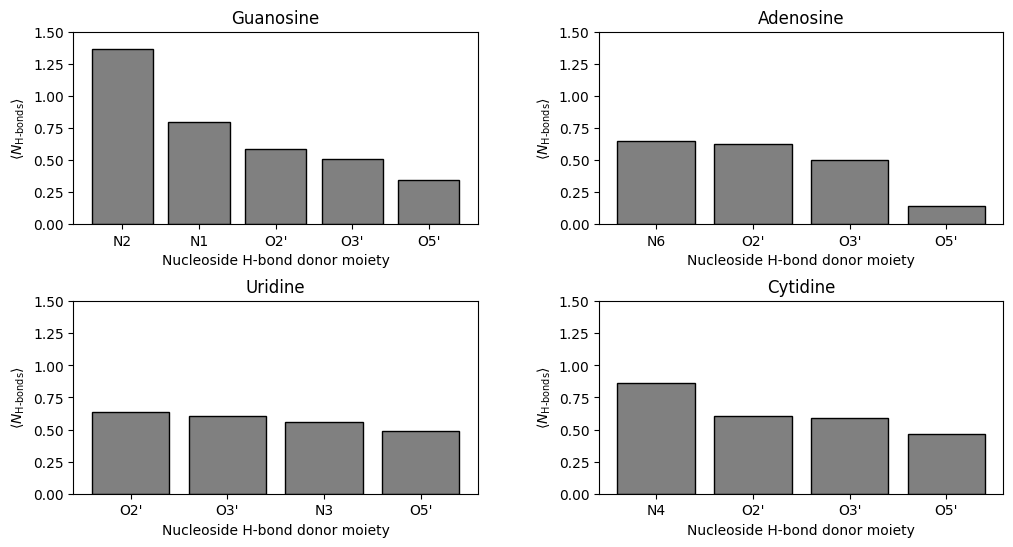

In [31]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanosine","Adenosine","Uridine","Cytidine"]
nucls="G","A","U","C"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color='gray',edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Nucleoside H-bond donor moiety")
        ax.set_ylim(top=1.5)
plt.savefig('fig_data/donormoieties_nucleosides.pdf', transparent=True,bbox_inches='tight')

## Fig.

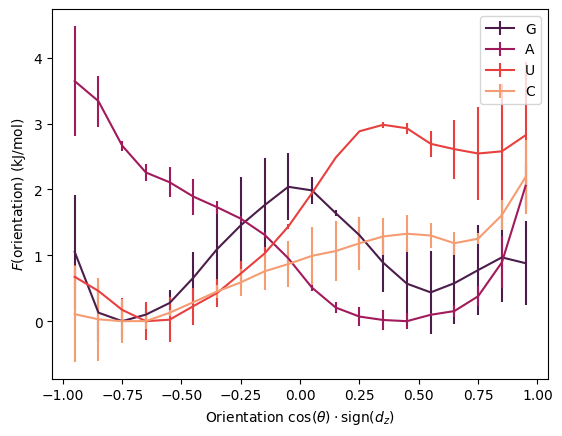

In [14]:
nucls=["G","A","U","C"]
for i_nucl,nucl in enumerate(nucls):
    data=np.loadtxt("fig_data/orientations/orientation1d_"+nucl)
    plt.errorbar(data[:,0],data[:,1]-np.min(data[:,1]),yerr=data[:,2],color=palette2[i_nucl],label=nucl)
plt.xlabel(r"Orientation $\cos(\theta)\cdot \text{sign}(d_z)$")
plt.ylabel(r"$F(\text{orientation})$ (kJ/mol)")
plt.legend()
plt.savefig('fig_data/orientation1d.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

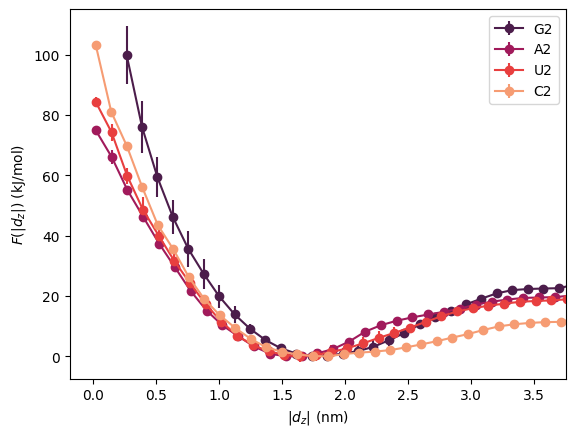

In [ ]:
nucls=["G2","A2","U2","C2"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    plt.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color=palette2[i_nucl])
plt.xlim(right=3.75)
plt.xlabel(r"$|d_z|$ (nm)")
plt.ylabel(r"$F(|d_z|$) (kJ/mol)")
plt.legend()
plt.savefig('fig_data/fes_dinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

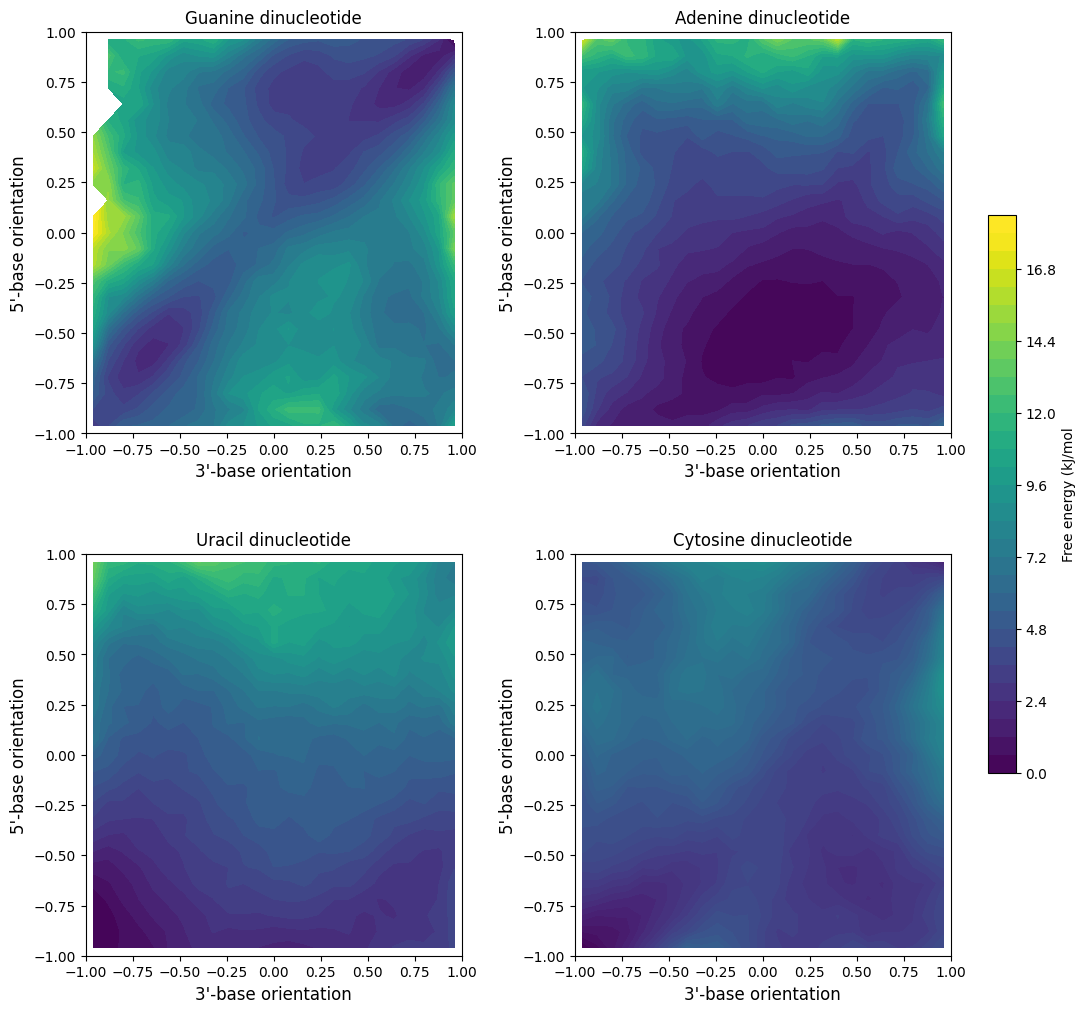

In [20]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
nucls=["G2","A2","U2","C2"]
contour_plots = []
for i_nucl,nucl in enumerate(nucls):
    data=np.loadtxt("fig_data/orientations/orientation2d_"+str(nucl))
    Z=np.load("fig_data/orientations/orientation2d_Z_"+str(nucl)+".npz")
    Z=np.ma.array(Z['data'], mask=Z['mask'])
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    CS=ax.contourf(data[:,0], data[:,1], Z, 30,vmin=0,vmax=18)
    contour_plots.append(CS)
    ax.set_title(bases[i_nucl])
    ax.set_xlabel("3'-base orientation",size=12)
    ax.set_ylabel("5'-base orientation",size=12)
    ax.set_xlim(right=1,left=-1)
    ax.set_ylim(top=1,bottom=-1)
    ax.set_xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
    ax.set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
cbar = fig.colorbar(contour_plots[0], ax=[plt.subplot(gs[i]) for i in range(4)], orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label("Free energy (kJ/mol")
plt.savefig('fig_data/orientation2d_dinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig. 

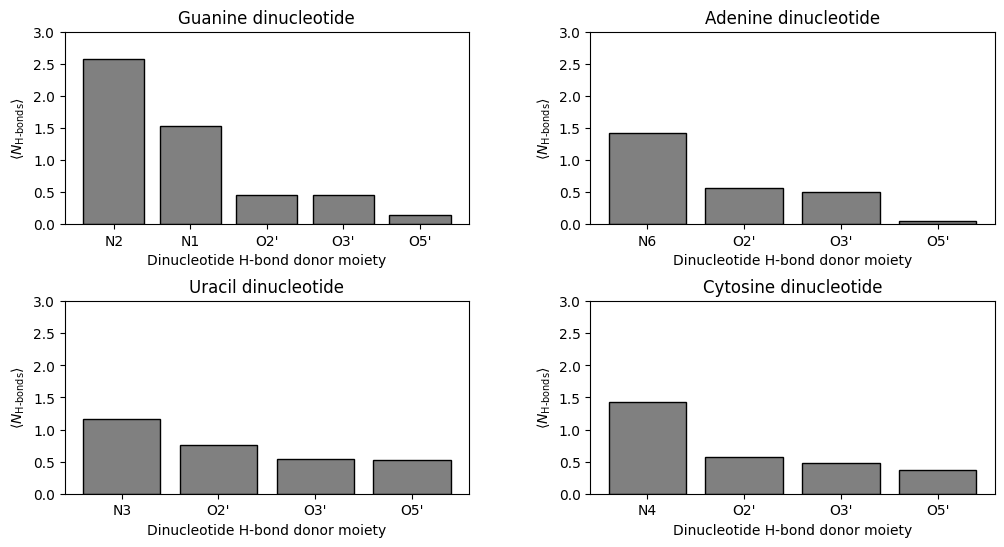

In [21]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
nucls="G2","A2","U2","C2"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color='gray',edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Dinucleotide H-bond donor moiety")
        ax.set_ylim(top=3)
plt.savefig('fig_data/donormoieties_dinucleotides.pdf', transparent=True,bbox_inches='tight')

## Fig. 

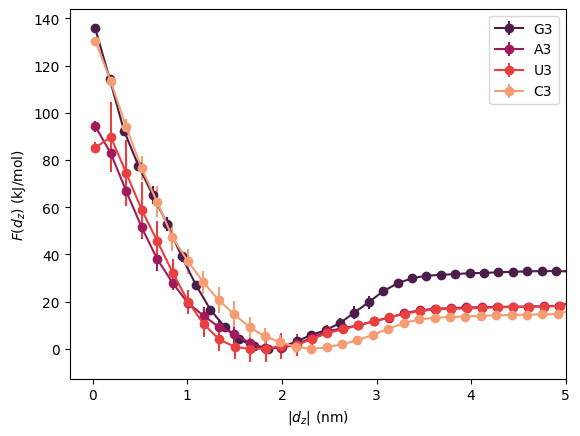

In [ ]:
nucls=["G3","A3","U3","C3"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    plt.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color=palette2[i_nucl])
plt.xlim(right=5)
plt.xlabel(r"$|d_z|$ (nm)")
plt.ylabel(r"$F(d_z$) (kJ/mol)")
plt.legend()
plt.savefig('fig_data/fes_trinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

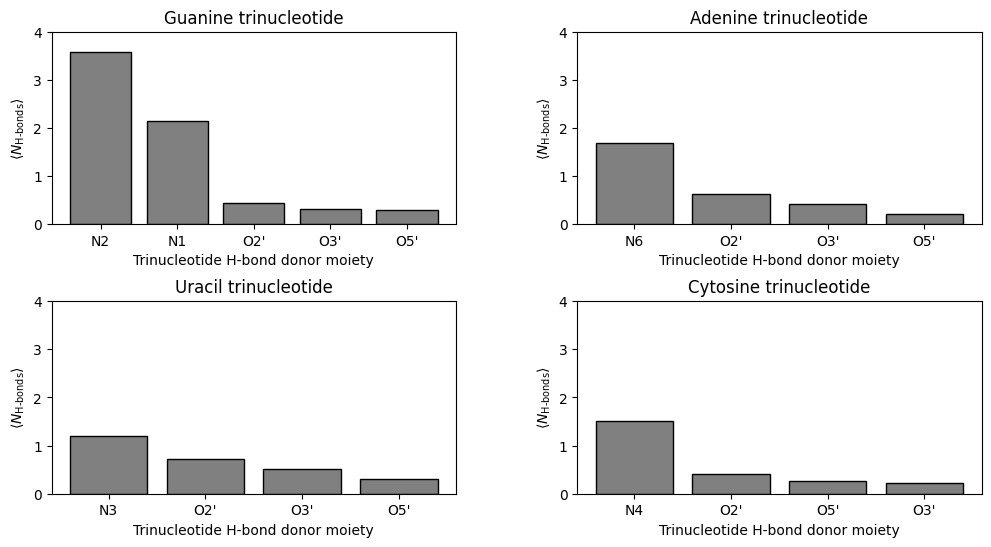

In [23]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine trinucleotide","Adenine trinucleotide","Uracil trinucleotide","Cytosine trinucleotide"]
nucls="G3","A3","U3","C3"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color='gray',edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Trinucleotide H-bond donor moiety")
        ax.set_ylim(top=4)
plt.savefig('fig_data/donormoieties_trinucleotides.pdf', transparent=True,bbox_inches='tight')

## Fig. 

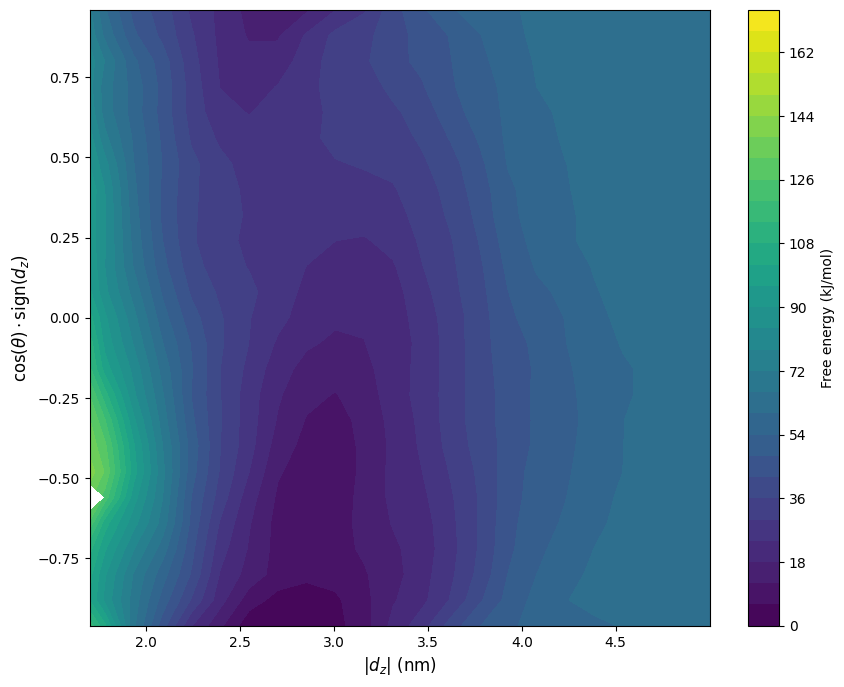

In [ ]:
fig = plt.figure(figsize=(10, 8))
data=np.loadtxt("fig_data/fes/fes_quadruplex_2d")
Z=np.load("fig_data/fes/fes_quadruplex_2d_Z.npz")
Z=np.ma.array(Z['data'], mask=Z['mask'])
CS=plt.contourf(data[:,0], data[:,1], Z, 30)
plt.xlabel(r"$|d_z|$ (nm)",size=12)
plt.ylabel(r"$\cos(\theta) \cdot \text{sign}(d_z)$",size=12)
plt.xlim(left=1.7)
cbar = plt.colorbar(CS)
cbar.set_label('Free energy (kJ/mol)')
plt.savefig('fig_data/fes2d_quadruplex.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

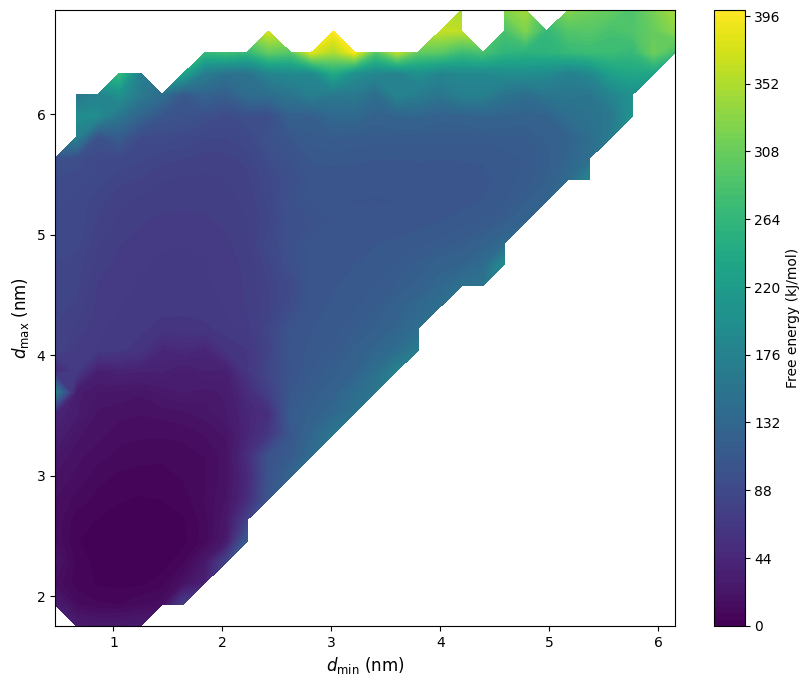

In [ ]:
fig = plt.figure(figsize=(10, 8))
data=np.loadtxt("fig_data/fes/fes_strand_2d")
Z=np.load("fig_data/fes/fes_strand_2d_Z.npz")
Z=np.ma.array(Z['data'], mask=Z['mask'])
CS=plt.contourf(data[:,0], data[:,1], Z, 100)
plt.xlabel(r"$d_{\text{min}}$ (nm)",size=12)
plt.ylabel(r"$d_{\text{max}}$ (nm)",size=12)
cbar = plt.colorbar(CS)
cbar.set_label('Free energy (kJ/mol)')
plt.savefig('fig_data/fes2d_strand.pdf', transparent=True,bbox_inches='tight')
plt.show()

# Fig.

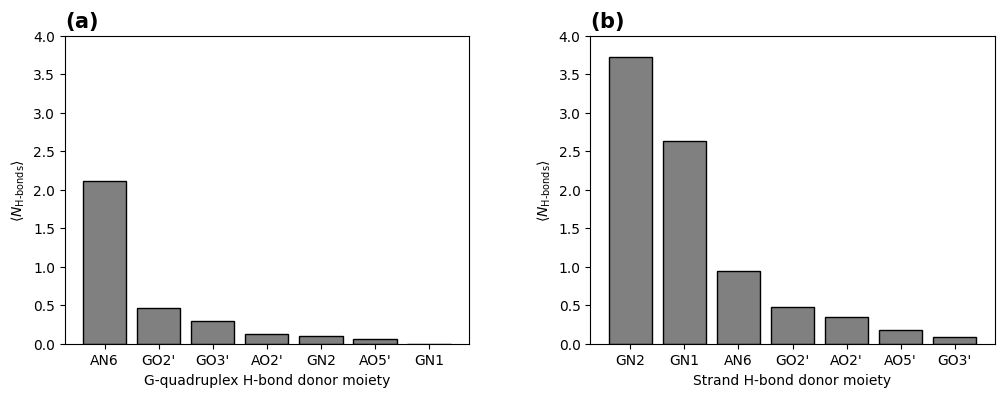

In [27]:
gs = gridspec.GridSpec(1, 2)#, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
data=np.genfromtxt("fig_data/contacts/donor_moieties_quadruplex",dtype=str)
for i in range(len(data)):
    ax1.bar(data[i,0],float(data[i,1]),color='gray',edgecolor='black')
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)
ax1.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
ax1.set_xlabel("G-quadruplex H-bond donor moiety")
ax1.set_ylim(top=4)
data=np.genfromtxt("fig_data/contacts/donor_moieties_strand",dtype=str)
for i in range(len(data)):
    ax2.bar(data[i,0],float(data[i,1]),color='gray',edgecolor='black')
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
ax2.set_xlabel("Strand H-bond donor moiety")
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)
ax2.set_ylim(top=4)
plt.savefig('fig_data/quad_strand_hbonds.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

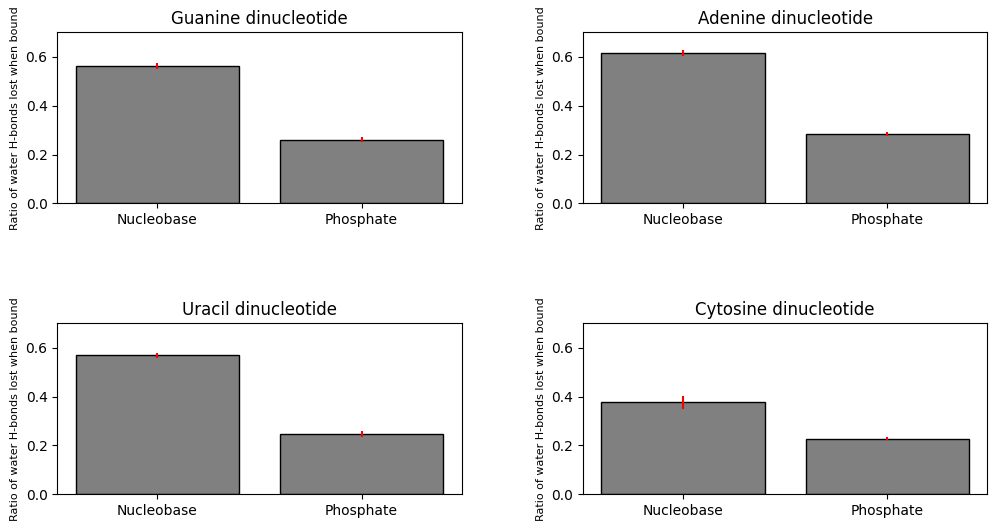

In [ ]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
data_base=np.genfromtxt("fig_data/contacts/basediffs_dinucleotides",dtype=float)
data_phosph=np.genfromtxt("fig_data/contacts/phosphdiffs_dinucleotides",dtype=float)
nucls="G2","A2","U2","C2"
for i_nucl,nucl in enumerate(nucls):

    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("Nucleobase",data_base[i_nucl,0],color='gray',edgecolor='black')
    ax.errorbar("Nucleobase",data_base[i_nucl,0],yerr=float(data_base[i_nucl,1]),ecolor='red',fmt='none')
    ax.bar("Phosphate",data_phosph[i_nucl,0],color='gray',edgecolor='black')
    ax.errorbar("Phosphate",data_phosph[i_nucl,0],yerr=data_phosph[i_nucl,1],ecolor='red',fmt='none')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel("Ratio of water H-bonds lost when bound",fontsize=8)
    ax.set_ylim(top=0.7)
plt.savefig('fig_data/diffs_dinucleotides.pdf', transparent=True,bbox_inches='tight')

## Fig.

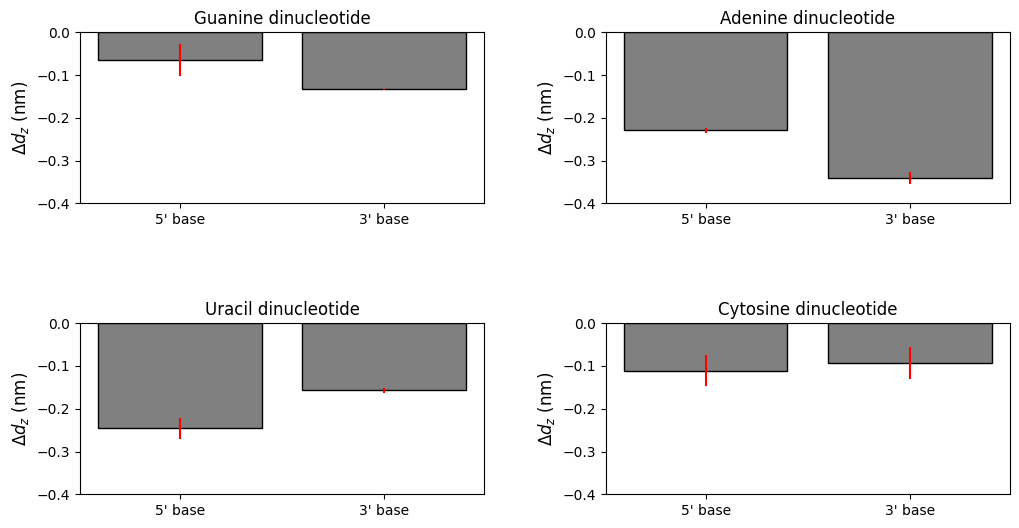

In [29]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
nucls="G2","A2","U2","C2"
for i_nucl,nucl in enumerate(nucls):
    data_base=np.genfromtxt("fig_data/contacts/phosphdzdist_"+nucl,dtype=float)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("5' base",data_base[0,0],color='gray',edgecolor='black')
    ax.errorbar("5' base",data_base[0,0],yerr=data_base[0,1],ecolor='red',fmt='none')
    ax.bar("3' base",data_base[1,0],color='gray',edgecolor='black')
    ax.errorbar("3' base",data_base[1,0],yerr=data_base[1,1],ecolor='red',fmt='none')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel(r"$\Delta d_z$ (nm)",fontsize=12)
    ax.set_ylim(bottom=-0.4)
plt.savefig('fig_data/zdistdiffs_dinucleotides.pdf', transparent=True,bbox_inches='tight')

## Fig.

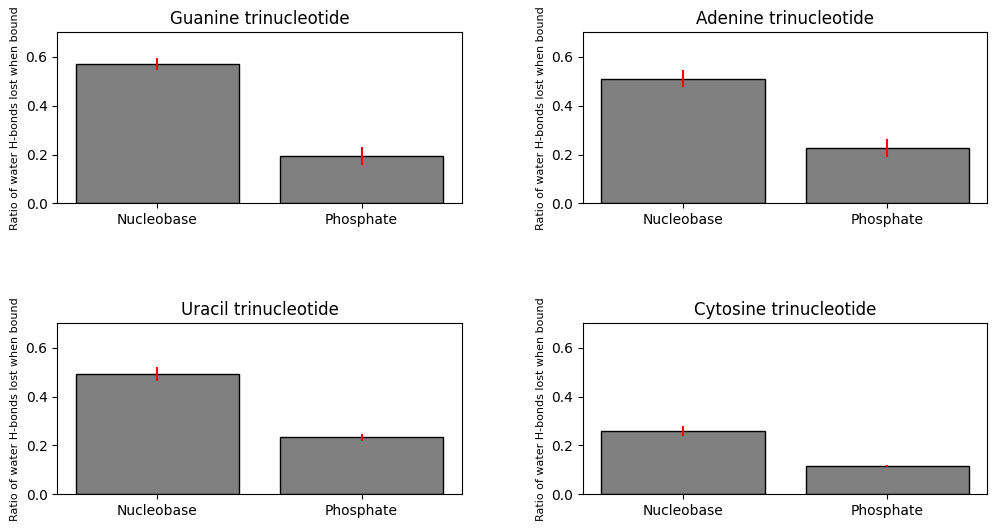

In [30]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine trinucleotide","Adenine trinucleotide","Uracil trinucleotide","Cytosine trinucleotide"]
data_base=np.genfromtxt("fig_data/contacts/basediffs_trinucleotides",dtype=float)
data_phosph=np.genfromtxt("fig_data/contacts/phosphdiffs_trinucleotides",dtype=float)
nucls="G3","A3","U3","C3"
for i_nucl,nucl in enumerate(nucls):

    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("Nucleobase",data_base[i_nucl,0],color='gray',edgecolor='black')
    ax.errorbar("Nucleobase",data_base[i_nucl,0],yerr=float(data_base[i_nucl,1]),ecolor='red',fmt='none')
    ax.bar("Phosphate",data_phosph[i_nucl,0],color='gray',edgecolor='black')
    ax.errorbar("Phosphate",data_phosph[i_nucl,0],yerr=data_phosph[i_nucl,1],ecolor='red',fmt='none')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel("Ratio of water H-bonds lost when bound",fontsize=8)
    ax.set_ylim(top=0.7)
plt.savefig('fig_data/diffs_trinucleotides.pdf', transparent=True,bbox_inches='tight')

In [ ]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine trinucleotide","Adenine trinucleotide","Uracil trinucleotide","Cytosine trinucleotide"]
data_base=np.genfromtxt("fig_data/contacts/basediffs_trinucleotides",dtype=float)
data_phosph=np.genfromtxt("fig_data/contacts/phosphdiffs_trinucleotides",dtype=float)
nucls="G3","A3","U3","C3"
for i_nucl,nucl in enumerate(nucls):

    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("Nucleobase",data_base[i_nucl,0],color='gray',edgecolor='black')
    ax.errorbar("Nucleobase",data_base[i_nucl,0],yerr=float(data_base[i_nucl,1]),ecolor='red',fmt='none')
    ax.bar("Phosphate",data_phosph[i_nucl,0],color='gray',edgecolor='black')
    ax.errorbar("Phosphate",data_phosph[i_nucl,0],yerr=data_phosph[i_nucl,1],ecolor='red',fmt='none')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel("Ratio of water H-bonds lost when bound",fontsize=8)
    ax.set_ylim(top=0.7)
plt.savefig('fig_data/diffs_trinucleotides.pdf', transparent=True,bbox_inches='tight')